<a href="https://colab.research.google.com/github/DennisSanchez21/DennisSanchez21/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 7.- Convolutional Neural Network.**
Estefany Dennis Sánchez Chávez 2010604
Class Day: Thursday
Hour: N4-N6

# 1. Load Libraries

In [1]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 2. Load data

In [2]:
# Load data
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# 3. Data preprocessing

In [3]:
# Data preprocessing
train_data = train_data.reshape((train_data.shape[0], 28, 28, 1)).astype('float32') / 255
test_data = test_data.reshape((test_data.shape[0], 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 4. Model selection and Training


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 51s 129ms/step - accuracy: 0.8160 - loss: 0.6122 - val_accuracy: 0.9788 - val_loss: 0.0761
Epoch 2/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 49s 129ms/step - accuracy: 0.9778 - loss: 0.0710 - val_accuracy: 0.9825 - val_loss: 0.0621
Epoch 3/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 127ms/step - accuracy: 0.9838 - loss: 0.0490 - val_accuracy: 0.9866 - val_loss: 0.0489
Epoch 4/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 125ms/step - accuracy: 0.9888 - loss: 0.0353 - val_accuracy: 0.9877 - val_loss: 0.0427
Epoch 5/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 77s 112ms/step - accuracy: 0.9907 - loss: 0.0275 - val_accuracy: 0.9858 - val_loss: 0.0475
Epoch 6/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 113ms/step - accuracy: 0.9929 - loss: 0.0229 - val_accuracy: 0.9893 - val_loss: 0.0427
Epoch 7/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 88s 128ms/step - accuracy: 0.9944 - loss: 0.0178 - val_accuracy: 0.9884 - val_loss: 0.0393
Epoch 8/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 80s 122ms/step - accuracy: 0.9947 - loss: 0.0164 - 

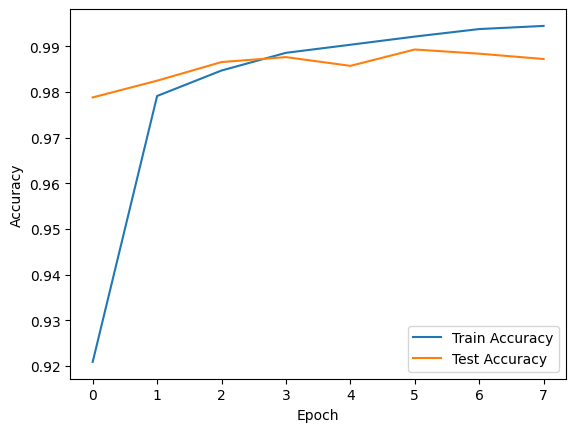

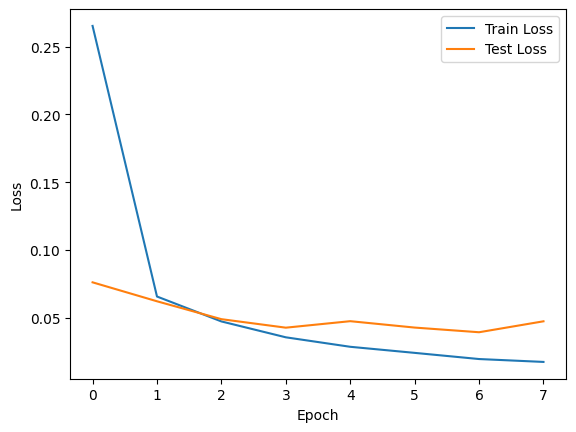

In [4]:
# Model selection and training
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=8, batch_size=128, validation_split=0.2)

# Plotting train and test accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting train and test loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 5. Model testing

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9853 - loss: 0.0466
Test Accuracy: 0.988099992275238
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Prediction: 1
Actual Value: 1


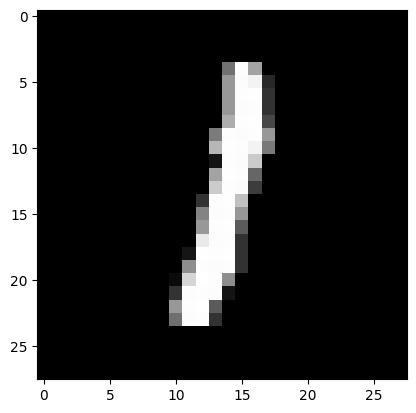

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction: 4
Actual Value: 4


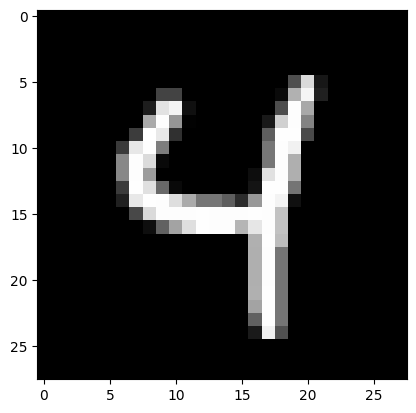

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: 1
Actual Value: 1


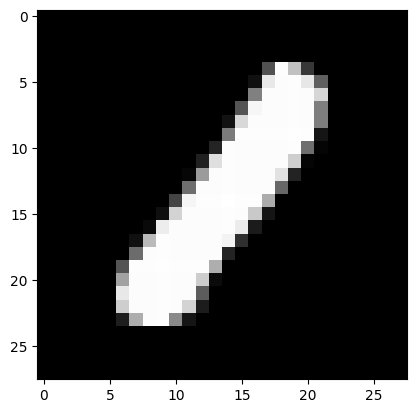

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction: 4
Actual Value: 4


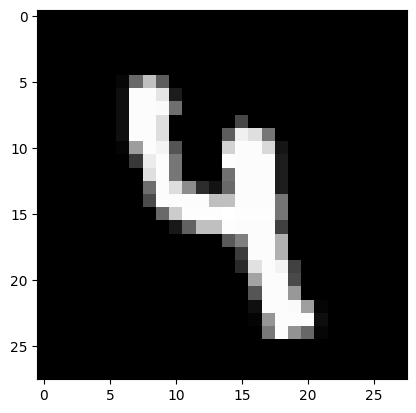

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediction: 9
Actual Value: 9


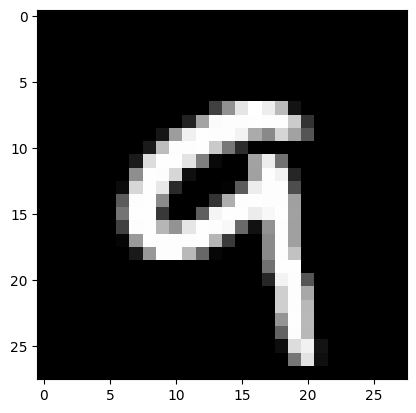

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


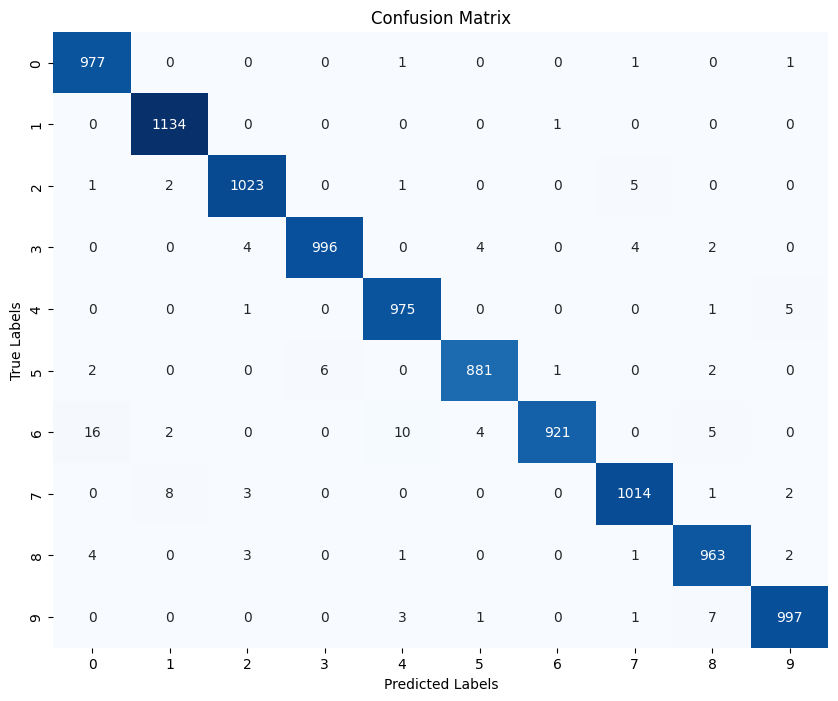

In [5]:
# Model testing
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print("Test Accuracy:", test_accuracy)

# Perform 5 different predictions
for _ in range(5):
    # Choose a random index from the test dataset
    idx = np.random.randint(0, len(test_data))
    # Make prediction
    predicted_label = np.argmax(model.predict(test_data[idx:idx+1]))
    # Display prediction and actual value
    print("Prediction:", predicted_label)
    print("Actual Value:", np.argmax(test_labels[idx]))
    # Plot the image
    plt.imshow(test_data[idx].reshape(28, 28), cmap='gray')
    plt.show()

# Confusion Matrix
predicted_labels = np.argmax(model.predict(test_data), axis=1)
true_labels = np.argmax(test_labels, axis=1)
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Questions
**How many epochs did you use to improve the performance of the model compared with the feedforward neural network of assignment 6?**

R. We use 8 epochs.

**Did you get a better performance on this assignment or on assignment 6? Why**?

R.Yes, we get better performance on this assignment. Convolutional Neural Networks (CNN) generally yields better performance compared to a feedforward neural network due to the convolutional layers capturing spatial hierarchies in the data. The convolutional layers learn to detect patterns, edges, and features in images, which is crucial for tasks like image classification. Additionally, pooling layers help in reducing spatial dimensions, making the model less sensitive to small changes in input images while maintaining important features. This results in a more robust and accurate model. The introduction of convolutional layers allows the model to learn features hierarchically, which can lead to better generalization and performance, especially for image data.